# Support Center Queue ... Stochastic Sim. Phase 2

Jill is happy that her code seems to be running well, and simulating a fixed arrival and service stream.  But she is ready to ramp-up her analysis.  First, she wants to simulate many days, and experiment with adding staff, etc.  The first step she thinks is to generate arrivals to the support center randomly, and generate random service times --- A monte carlo simulation.  She knows from her intro to Ops class (which she loved), that one way to help validate her code is to compare it to a theoretical M/M/1 queueing system.  Once she sees her code match the theoretical values, she would feel better about making changes to the distribution, etc.  That is, she will have confidence that her code is working.   So here is her current plan for Phase 2:

- Jobs arrive to the support center with interarrival times according to an exponential distribution
- Service times are generated according to an exponential distribution
- Still just one server (for now!)

Thus she will be simulating an M/M/1 queueing system

## Let's load up some common code modules before we begin

In [55]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## Now we'll generate some jobs to process

We will generate 100,000 jobs with stochastic interarrival rate and processing times per the M/M/1 queue specification.

In [222]:
NUMBER_OF_ARRIVALS = 100000
MEAN_TIME_BETWEEN_ARRIVALS = 200
MEAN_SERVICE_TIME = 190

arrival_jobs = []

# Optional: If you'd like to have "determinstic randomness" in your simulation, uncomment the following line and run this code block
np.random.seed(55)

for i in range(NUMBER_OF_ARRIVALS):
    # create a new job dictionary with empty values
    new_job = {'arrival_time': None, 'service_completion_time': None}

    # Randomly generate job arrival time per exponential distribution 
    if (i==0):
        new_job['arrival_time'] = 0
    else:
        # note arrival_jobs[-1] returns the last job in the arrival_jobs list 
        last_arrival_time = arrival_jobs[-1]['arrival_time']
        next_arrival_time = last_arrival_time + math.ceil(np.random.exponential(MEAN_TIME_BETWEEN_ARRIVALS))
        new_job['arrival_time'] = next_arrival_time
    
    # add newly created job to the end of the arrival_jobs list
    arrival_jobs.append(new_job)

# Let's inspect the first 20 arrival_jobs
pprint(arrival_jobs[:20],indent=4)


[   {'arrival_time': 0, 'service_completion_time': None},
    {'arrival_time': 20, 'service_completion_time': None},
    {'arrival_time': 733, 'service_completion_time': None},
    {'arrival_time': 866, 'service_completion_time': None},
    {'arrival_time': 922, 'service_completion_time': None},
    {'arrival_time': 1074, 'service_completion_time': None},
    {'arrival_time': 1142, 'service_completion_time': None},
    {'arrival_time': 1540, 'service_completion_time': None},
    {'arrival_time': 1549, 'service_completion_time': None},
    {'arrival_time': 1572, 'service_completion_time': None},
    {'arrival_time': 1864, 'service_completion_time': None},
    {'arrival_time': 1875, 'service_completion_time': None},
    {'arrival_time': 2174, 'service_completion_time': None},
    {'arrival_time': 2176, 'service_completion_time': None},
    {'arrival_time': 2369, 'service_completion_time': None},
    {'arrival_time': 2711, 'service_completion_time': None},
    {'arrival_time': 3169, 'serv

## Let's create a few more data structures that will be useful for our simulation

In [223]:
# jobs_in_queue is a list to hold jobs that have arrived and are waiting for service
jobs_in_queue = []
# A representation of a single server
server = {'job_in_service': None}
# completed_jobs is a list holding when jobs complete service
completed_jobs = []
# Store the total system time for each job into a list
system_time=[]
# total number of jobs 
TOTAL_NUMBER_OF_JOBS = len(arrival_jobs)

## And let's define some utility functions

These will help make our simulation code more consise and readable.

In [224]:
def jobs_exist(jobs):
    return len(jobs) > 0

def all_jobs_are_complete():
    return len(completed_jobs) == TOTAL_NUMBER_OF_JOBS

def next_job_has_arrived(now):
    return arrival_jobs[0]['arrival_time'] == now

def is_job_complete(time_period):
    return server['job_in_service']['service_completion_time'] == time_period

# two functions for interacting with our server
def is_server_free():
    return server['job_in_service'] == None

def assign_job_to_server(job):
    server['job_in_service'] = job

## We will now loop through time, with a variable called  `time_period`

In [225]:
#  We will increment time_period as simulation proceeds
time_period = 0

#  We will run our simulation until all jobs have been completed
while not all_jobs_are_complete():
        
    if jobs_exist(arrival_jobs) and next_job_has_arrived(time_period):        
        # add job that arrived to the queue of jobs to be serviced
        job_moving_to_queue = arrival_jobs.pop(0)
        jobs_in_queue.append(job_moving_to_queue)

    if not is_server_free() and is_job_complete(time_period):
        # add finished job_in_service to the end of the completed_jobs list
        job_in_service = server['job_in_service']
        completed_jobs.append(job_in_service)
        # calculate total time spent in the system
        system_time.append(job_in_service['service_completion_time'] - job_in_service['arrival_time'])
        # Free up our server
        assign_job_to_server(None)
        
    if is_server_free() and jobs_exist(jobs_in_queue):
        # remove next pending job from queue
        next_job_to_serve = jobs_in_queue.pop(0)
        # randomly generate the time it will take for server to complete service of this job, per exponential distribution
        service_time = math.ceil(np.random.exponential(MEAN_SERVICE_TIME))
        next_job_to_serve["service_time"] = service_time
        next_job_to_serve["service_completion_time"] = time_period + service_time
        assign_job_to_server(next_job_to_serve)

    # Increment the time_period and loop again
    time_period += 1

In [226]:
pprint(completed_jobs[:20])

[{'arrival_time': 0, 'service_completion_time': 432, 'service_time': 432},
 {'arrival_time': 20, 'service_completion_time': 777, 'service_time': 344},
 {'arrival_time': 733, 'service_completion_time': 843, 'service_time': 65},
 {'arrival_time': 866, 'service_completion_time': 1070, 'service_time': 204},
 {'arrival_time': 922, 'service_completion_time': 1401, 'service_time': 330},
 {'arrival_time': 1074, 'service_completion_time': 1427, 'service_time': 25},
 {'arrival_time': 1142, 'service_completion_time': 1527, 'service_time': 99},
 {'arrival_time': 1540, 'service_completion_time': 1902, 'service_time': 362},
 {'arrival_time': 1549, 'service_completion_time': 2048, 'service_time': 145},
 {'arrival_time': 1572, 'service_completion_time': 2282, 'service_time': 233},
 {'arrival_time': 1864, 'service_completion_time': 2636, 'service_time': 353},
 {'arrival_time': 1875, 'service_completion_time': 2935, 'service_time': 298},
 {'arrival_time': 2174, 'service_completion_time': 3273, 'service_

### Let's inspect the total system time

In [230]:
pprint(system_time[:20])

[432,
 757,
 110,
 204,
 479,
 353,
 385,
 362,
 499,
 710,
 772,
 1060,
 1099,
 1284,
 1140,
 1315,
 871,
 103,
 159,
 96]


In [228]:
print('The average system time is:',np.mean(system_time))

The average system time is: 4402.44291


### Compare to M/M/1 theoretical average time in system
- $CT = \frac{1}{\mu - \lambda}$
- Here, $\mu$ is the average service rate, 1/MEAN_SERVICE_TIME
- And $\lambda$ is the average arrival rate, 1/MEAN_TIME_BETWEEN_ARRIVALS

In [166]:
print('The theoretical average system time is:',1/( (1/MEAN_SERVICE_TIME) - (1/MEAN_TIME_BETWEEN_ARRIVALS) ))

The theoretical average system time is: 3800.000000000003


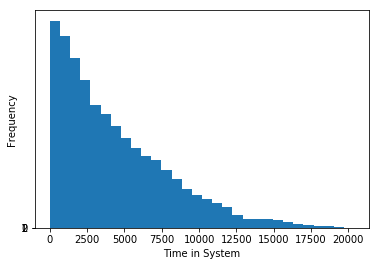

In [157]:
# Tinker with number of bins, until it looks right
plt.hist(system_time,bins=30)
# you can customize the exact tick marks on an axis
plt.yticks(range(0,3))
plt.ylabel('Frequency');
plt.xlabel('Time in System');

## The NumPy package provides lots of statistical methods, we call it with `np`

In [84]:
np.max(system_time)

20288

In [85]:
# 50th percentile, or median
np.percentile(system_time,50)

2369.0

In [86]:
np.median(system_time)

2369.0

In [87]:
np.std(system_time)

3275.2440822089316

In [88]:
np.mean(system_time)

3433.66412

# Homework/In-class work

1. Consider the following function that will return an exponential random variable that takes one argument, the mean, 

```
def exponential(mean):
    # using math.ceil will round up all floating point numbers
    return math.ceil(np.random.exponential(mean))
```

    - So, to get an exponential random variable with mean 10, we would use: `exponential(10)`

    - Incorporate this function into the code and use it to for arrivals and service times

1. Of course, we may want to use other distributions in a simulation.  Write functions for other distributions,  `normal`, `triangular`,  and `uniform`, explore the `numpy` documentation:  https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

   - remember, make sure your functions return only positive integers for our purposes.
   - try out each of your functions in a cell to make sure they work as expected

   
